In [20]:
import os
import zipfile
import urllib.request
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14,7)

In [2]:
# Data Source
data_path = '../data/'
urls = {
    'candidatos': 'http://agencia.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2018.zip',
    'bens': 'http://agencia.tse.jus.br/estatistica/sead/odsele/bem_candidato/bem_candidato_2018.zip',
    'coligacoes': 'http://agencia.tse.jus.br/estatistica/sead/odsele/consulta_coligacao/consulta_coligacao_2018.zip',
    'vagas': 'http://agencia.tse.jus.br/estatistica/sead/odsele/consulta_vagas/consulta_vagas_2018.zip',
    'cassacao': 'http://agencia.tse.jus.br/estatistica/sead/odsele/motivo_cassacao/motivo_cassacao_2018.zip'
}

In [3]:
def maybe_download(url, download_path):
    filename = url.split('/')[-1]
    file_path = os.path.join(download_path, filename)
    
    if not os.path.exists(download_path):
        os.makedirs(download_path)
    
    if not os.path.exists(file_path):
        print('Downloading {} ...'.format(url))
        file_path, _ = urllib.request.urlretrieve(url=url, filename=file_path)
        print('Download finished.')
    else:
        print('{} already exists.'.format(url))
    
    if file_path.endswith('.zip'):
        extract_to_path = file_path[:-4]
        if not os.path.exists(extract_to_path):
            os.makedirs(extract_to_path)
            zipfile.ZipFile(file=file_path, mode='r').extractall(extract_to_path)
            print('File extracted to {}.'.format(extract_to_path))
        return extract_to_path
    return file_path

In [4]:
paths = {}
for key, url in urls.items():
    file_path = maybe_download(url, data_path)
    paths[key] = file_path

http://agencia.tse.jus.br/estatistica/sead/odsele/consulta_coligacao/consulta_coligacao_2018.zip already exists.
http://agencia.tse.jus.br/estatistica/sead/odsele/bem_candidato/bem_candidato_2018.zip already exists.
http://agencia.tse.jus.br/estatistica/sead/odsele/consulta_vagas/consulta_vagas_2018.zip already exists.
http://agencia.tse.jus.br/estatistica/sead/odsele/motivo_cassacao/motivo_cassacao_2018.zip already exists.
http://agencia.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2018.zip already exists.


In [5]:
dfs = {}
for key, path in paths.items():
    dfs[key] = pd.concat([pd.read_csv(f, encoding='latin1', sep=';') for f in glob.glob(os.path.join(path, '*.csv'))], ignore_index=True)

In [6]:
dfs['candidatos'].head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,NR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO
0,24/08/2018,19:01:07,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,...,PARDA,257,EMPRESÁRIO,-1,-1,#NULO#,N,S,-1,6004608220186150000
1,24/08/2018,19:01:07,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,...,PARDA,111,MÉDICO,-1,-1,#NULO#,S,S,-1,6002798120186150000
2,24/08/2018,19:01:07,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,...,BRANCA,169,COMERCIANTE,-1,-1,#NULO#,N,S,-1,6005197020186150000
3,24/08/2018,19:01:07,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,...,PARDA,257,EMPRESÁRIO,-1,-1,#NULO#,N,S,-1,6002182620186150000
4,24/08/2018,19:01:07,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,...,BRANCA,257,EMPRESÁRIO,-1,-1,#NULO#,S,S,-1,6006443820186150000


In [7]:
for key, df in dfs.items():
    print(key, df.columns)

coligacoes Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO',
       'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO'],
      dtype='object')
bens Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'SG_UF',
       'SG_UE', 'NM_UE', 'SQ_CANDIDATO', 'NR_ORDEM_CANDIDATO',
       'CD_TIPO_BEM_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO', 'DS_BEM_CANDIDATO',
       'VR_BEM_CANDIDATO', 'DT_ULTIMA_ATUALIZACAO', 'HH_ULTIMA_ATUALIZACAO'],
      dtype='object')
vagas Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'DT_POSSE',
       'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO', 'QT_VAGAS'],
      dtyp

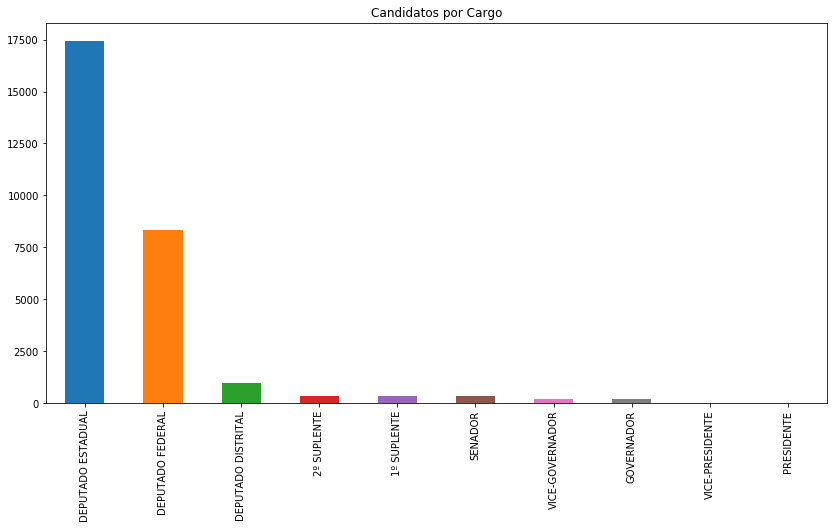

In [21]:
plt.title('Candidatos por Cargo')
dfs['candidatos']['DS_CARGO'].value_counts().plot(kind='bar')

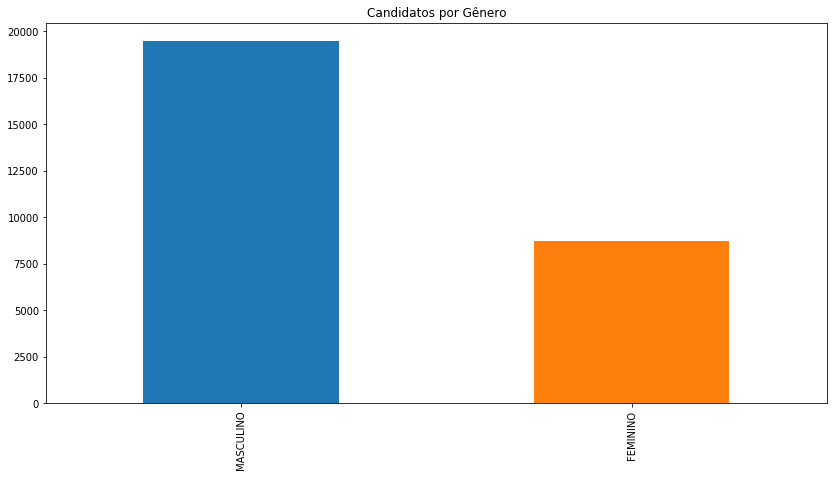

In [22]:
plt.title('Candidatos por Gênero')
dfs['candidatos']['DS_GENERO'].value_counts().plot(kind='bar')

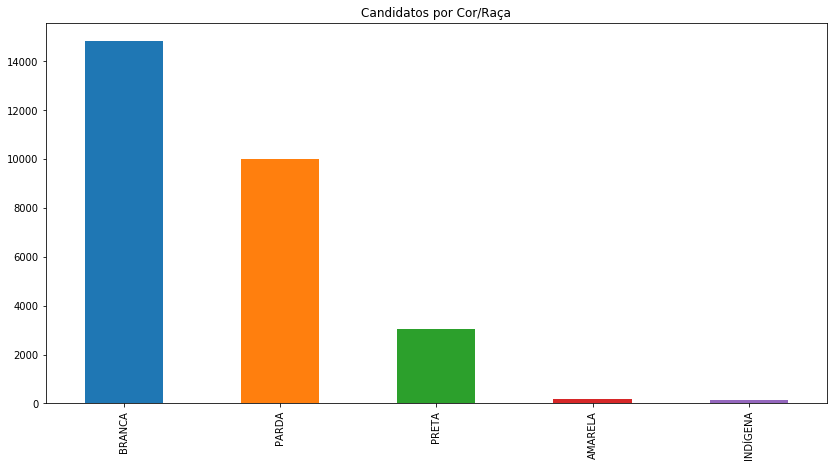

In [23]:
plt.title('Candidatos por Cor/Raça')
dfs['candidatos']['DS_COR_RACA'].value_counts().plot(kind='bar')

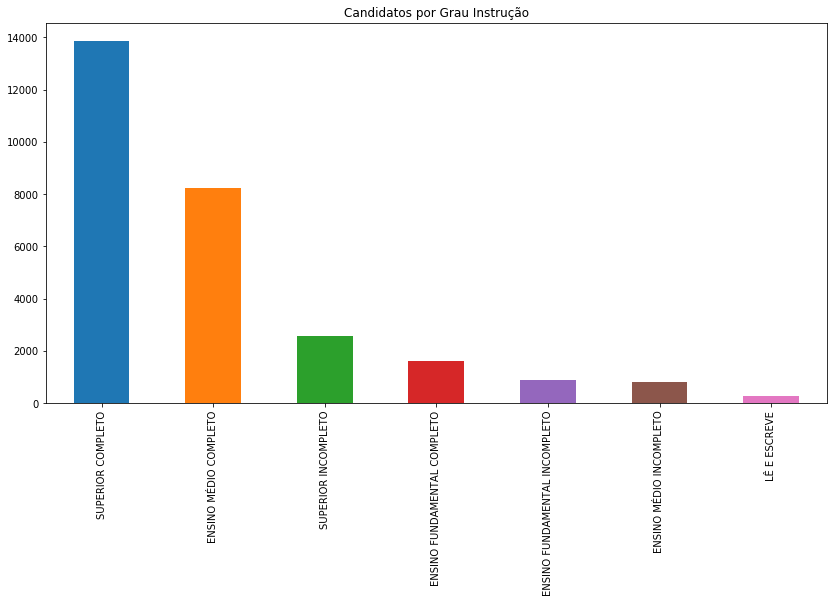

In [24]:
plt.title('Candidatos por Grau Instrução')
dfs['candidatos']['DS_GRAU_INSTRUCAO'].value_counts().plot(kind='bar')

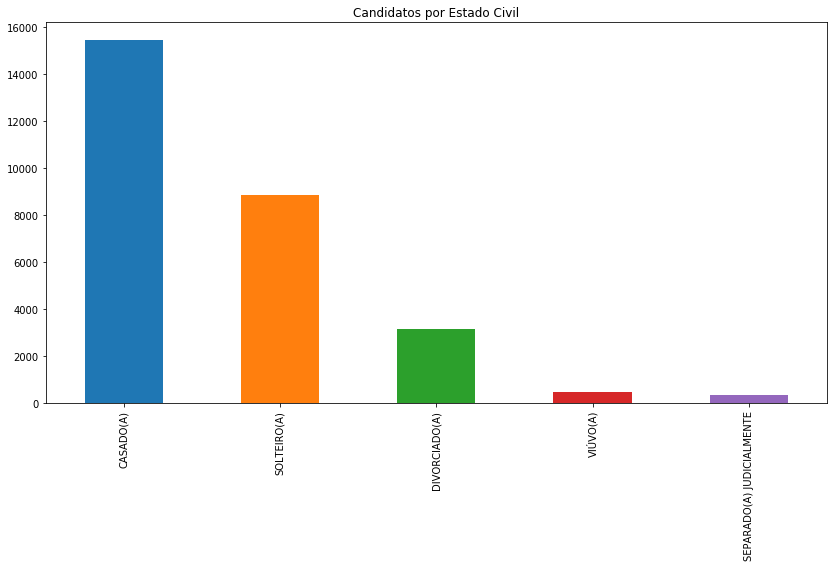

In [25]:
plt.title('Candidatos por Estado Civil')
dfs['candidatos']['DS_ESTADO_CIVIL'].value_counts().plot(kind='bar')

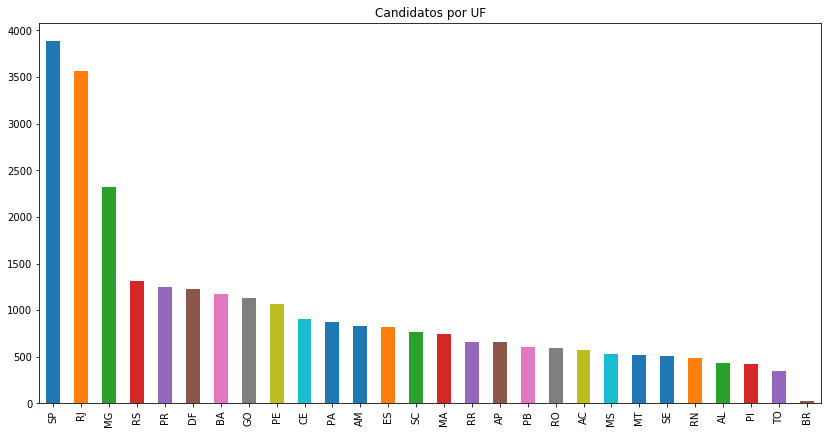

In [26]:
plt.title('Candidatos por UF')
dfs['candidatos']['SG_UF'].value_counts().plot(kind='bar')

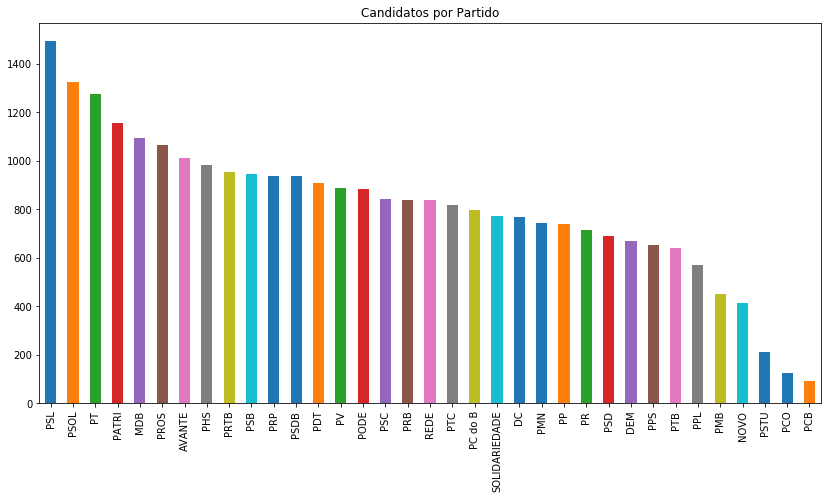

In [27]:
plt.title('Candidatos por Partido')
dfs['candidatos']['SG_PARTIDO'].value_counts().plot(kind='bar')

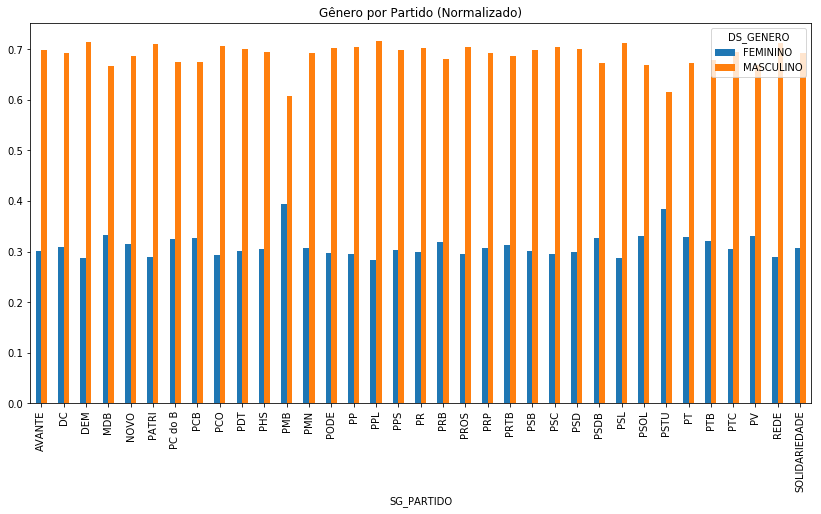

In [28]:
dfs['candidatos'].groupby('SG_PARTIDO')['DS_GENERO'].value_counts(normalize=True).unstack(1).plot(kind='bar', title="Gênero por Partido (Normalizado)")

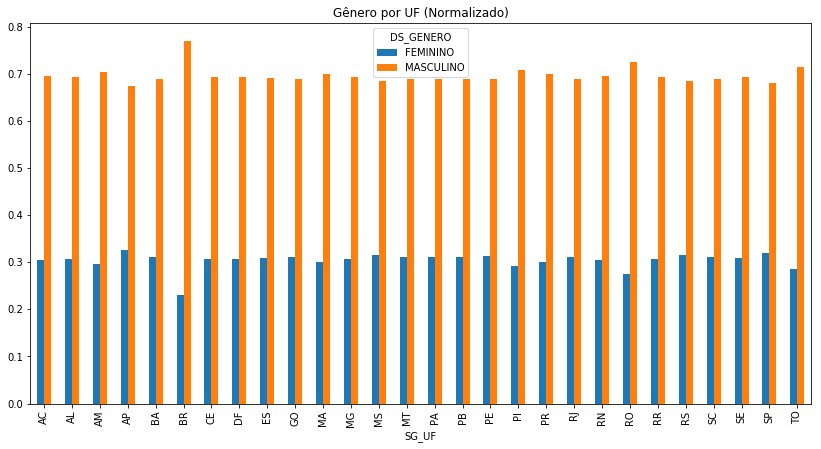

In [29]:
dfs['candidatos'].groupby('SG_UF')['DS_GENERO'].value_counts(normalize=True).unstack(1).plot(kind='bar', title='Gênero por UF (Normalizado)')

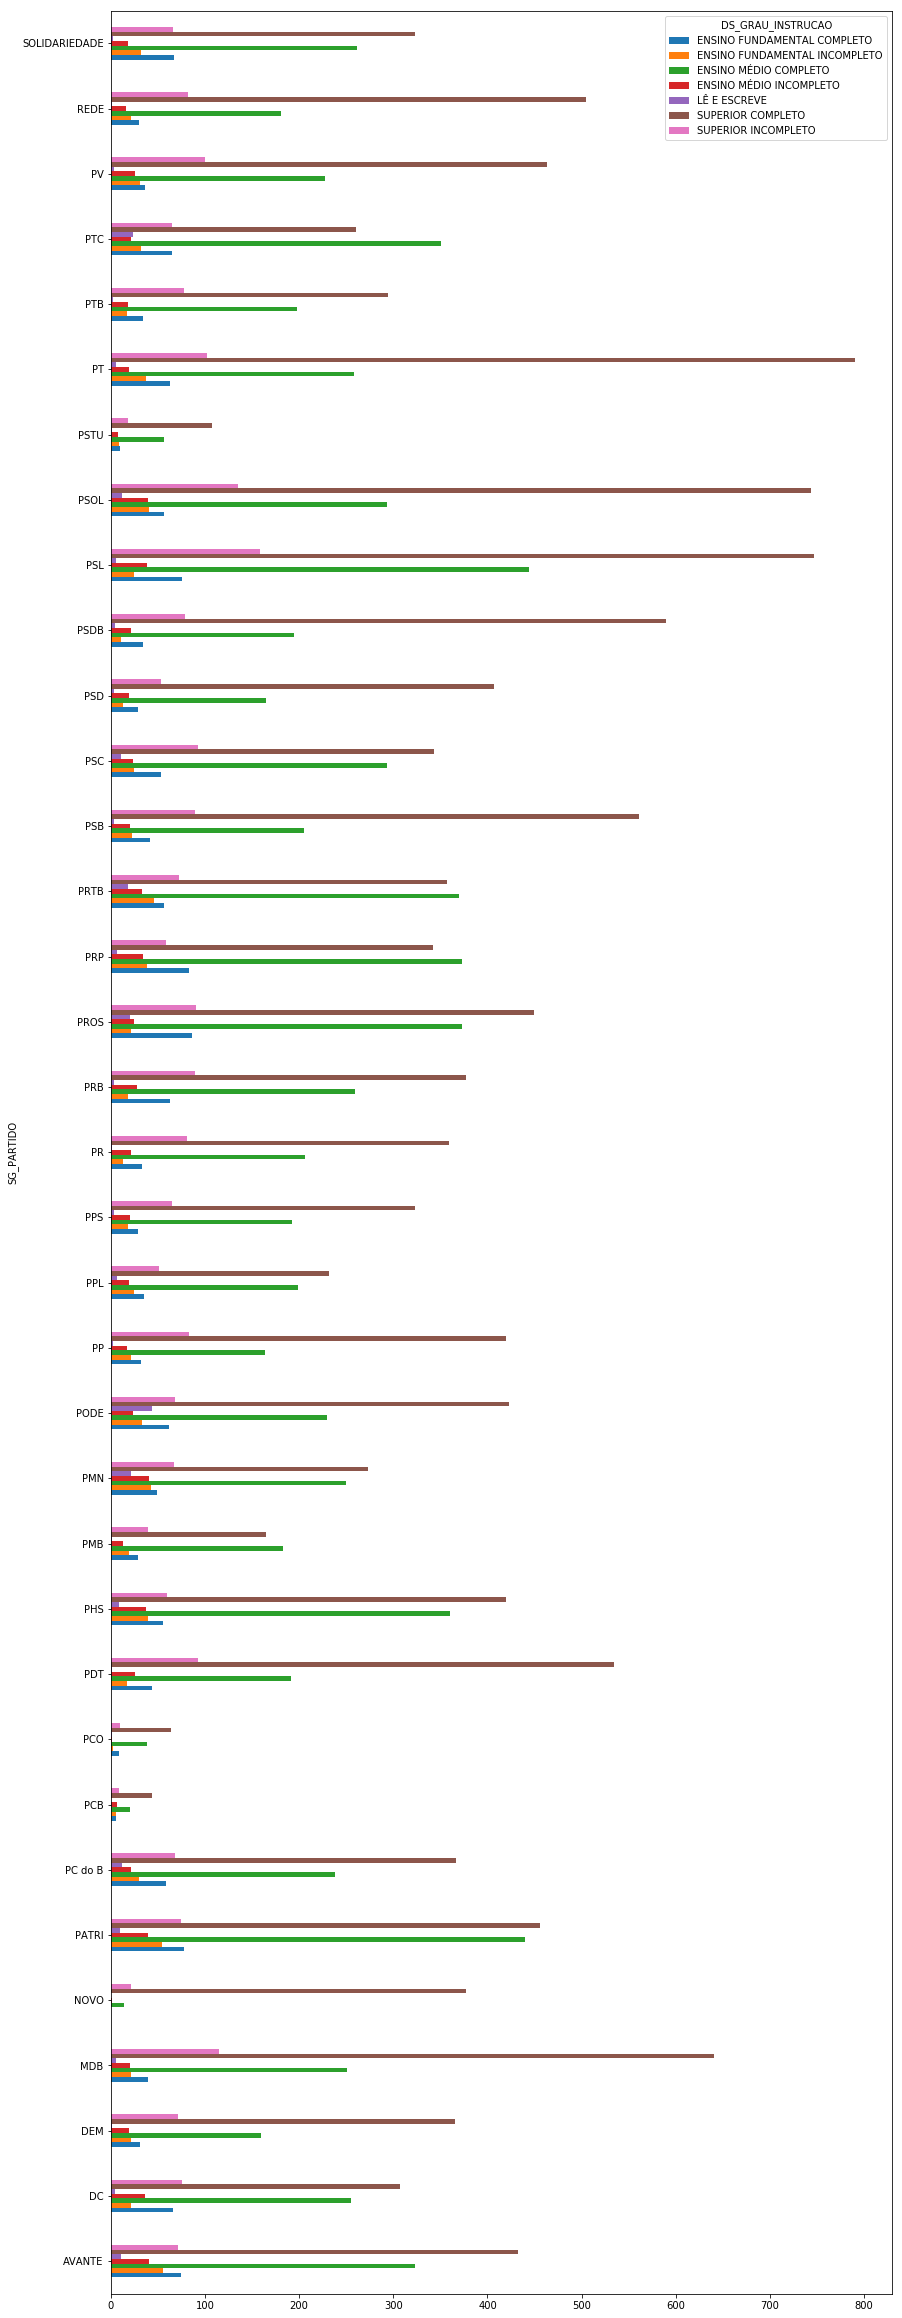

In [30]:
dfs['candidatos'].groupby('SG_PARTIDO')['DS_GRAU_INSTRUCAO'].value_counts().unstack(1).plot(kind='barh', figsize=(14,42))